In [2]:
!pip install "qiskit==1.3.2"

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import qiskit

In [4]:
qiskit.__version__

'1.3.2'

In [4]:
pip show qiskit


Name: qiskit
Version: 1.3.2
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: 
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /users/PLS0167/rjahan01/.local/lib/python3.9/site-packages
Requires: symengine, sympy, python-dateutil, numpy, stevedore, dill, rustworkx, scipy, typing-extensions
Required-by: qiskit-ibm-runtime, qiskit-ibm-provider, qiskit-algorithms, qiskit-aer
Note: you may need to restart the kernel to use updated packages.


In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [6]:
# Install Qiskit if not already installed
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install qiskit-ibm-runtime

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install 'qiskit[visualization]'

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install qiskit_aer

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

In [10]:
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session

# Create a simple quantum circuit
qc = QuantumCircuit(2)

# h[0] = |0> + |1>/sqrt(2)
# h[1] = |0> - |1>/ sqrt(2)
qc.h(0)

# |Psi> = |00> + |11>/sqrt(2)
qc.cx(0, 1)
qc.measure_all()

# Use Qiskit Aer simulator
backend = AerSimulator()
estimator = Estimator()

# Print confirmation
print("Qiskit 1.3.1 setup is working correctly!")

Qiskit 1.3.1 setup is working correctly!


/tmp/slurmtmp.34936021/ipykernel_169592/1321213518.py:19: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [11]:
!pip install qiskit-ibm-provider

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install qiskit-algorithms

Defaulting to user installation because normal site-packages is not writeable


In [13]:
!pip install --upgrade qiskit-algorithms

Defaulting to user installation because normal site-packages is not writeable


Sampled control bits   : 00010111 → 4 ones
Sampled counter value  : 0100 (binary)
Full sampled bitstring : 010000010111 (c_out[11]..c_out[0])


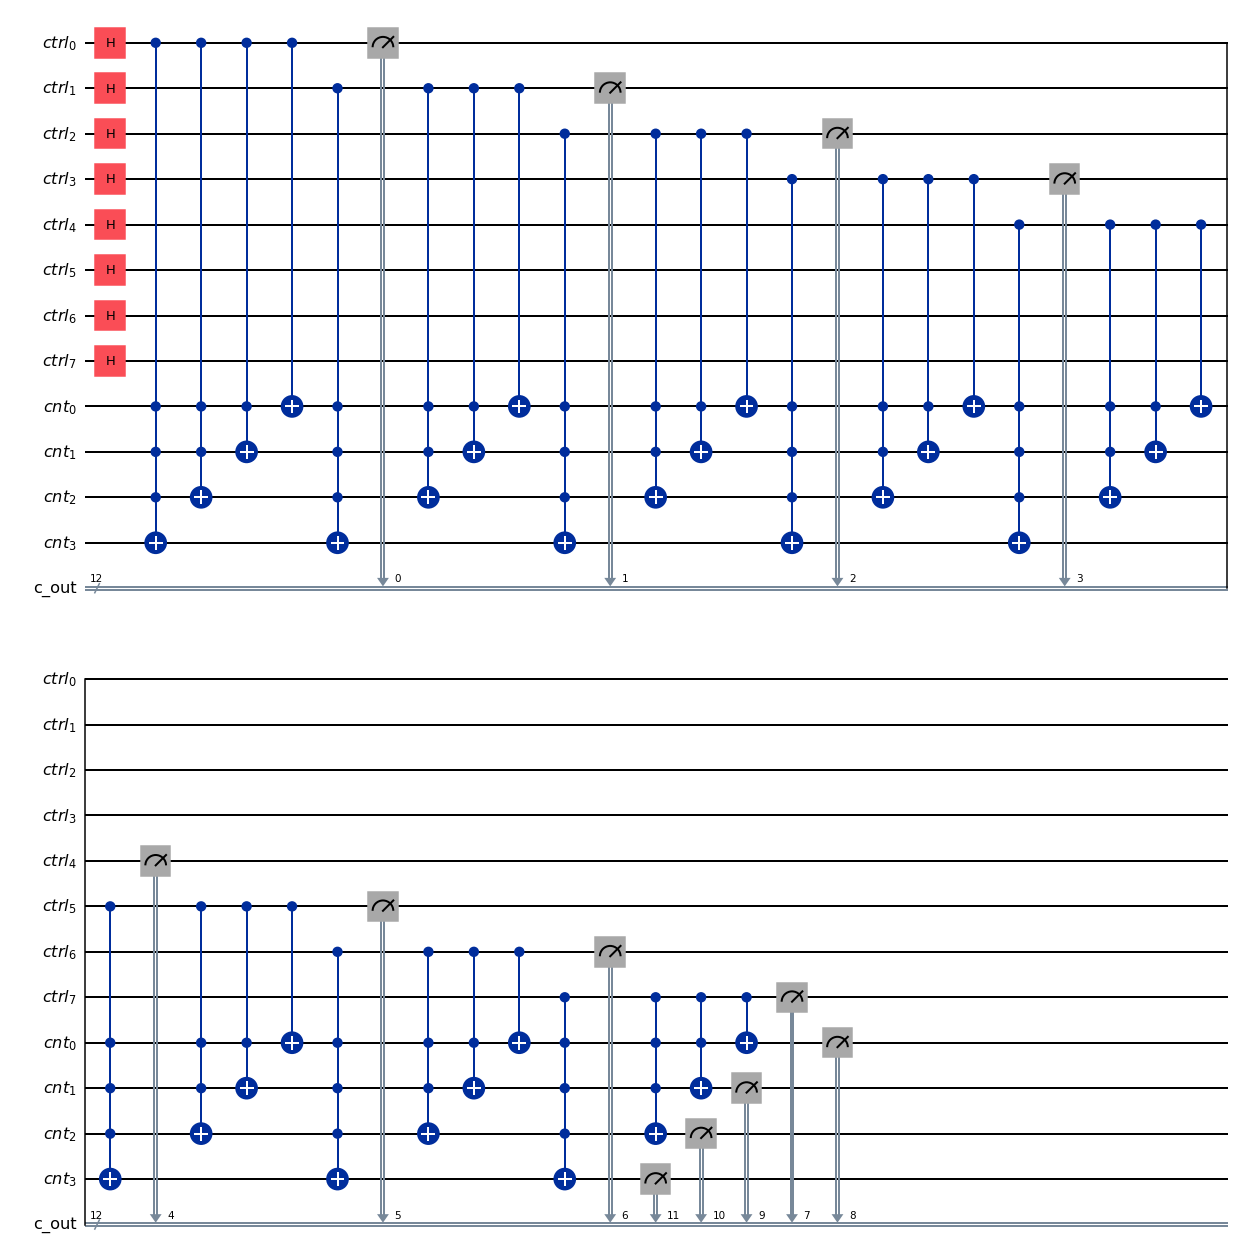

In [ ]:
# Simple quantum counter for 8 superposed qubits

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
import math

# Parameters
p = 8      # number of control qubits
q = 1       # number of counters
c = math.ceil(math.log2(p + 1))  # bits per counter

# Registers
ctrl = QuantumRegister(p, 'ctrl')
cnt = QuantumRegister(q * c, 'cnt')
creg = ClassicalRegister(p + c, 'c_out')  # control bits + counter
qc = QuantumCircuit(ctrl, cnt, creg)



# Step 1: Superpose all control qubits
qc.h(ctrl)

# Step 2: Quantum Counter logic
for i in range(p):
    for j in range(q):
        for k in reversed(range(1, c)):
            controls = [ctrl[i]] + [cnt[j * c + x] for x in range(k)]
            target = cnt[j * c + k]
            qc.mcx(controls, target)
        qc.cx(ctrl[i], cnt[j * c])  # LSB flip

# Step 3: Measure
for i in range(p):
    qc.measure(ctrl[i], creg[i])  # control bits
for i in range(c):
    qc.measure(cnt[i], creg[p + i])  # counter

# Simulate
sim = AerSimulator()
job = sim.run(qc, shots=1, memory=True)
result = job.result()
memory = result.get_memory()
sampled = memory[0]

# # Parse
control_bits = sampled[-p:]
counter_bits = sampled[-(p + c):-p]
control_ones = control_bits.count('1')


# Output
print(f"Sampled control bits   : {control_bits} → {control_ones} ones")
print(f"Sampled counter value  : {counter_bits} (binary)")
print(f"Full sampled bitstring : {sampled} (c_out[{p + c - 1}]..c_out[0])")






# qc.draw()
qc.draw('mpl')
